<a href="https://colab.research.google.com/github/amanjeetsahu/California-Housing-Price-Prediction/blob/master/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project : California Housing Price Prediction


## Problem Statement

The purpose of the project is to predict median house values in Californian districts, given many
features from these districts.

The project also aims at building a model of housing prices in California using the California census
data. The data has metrics such as the population, median income, median housing price, and so on
for each block group in California. This model should learn from the data and be able to predict the
median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are
20,640 districts in the project dataset.

# Import Statements

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/amanjeetsahu/California-Housing-Price-Prediction/master/housing.csv')

In [0]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [0]:
df.shape

(20640, 10)

# Cleaning Data

In [0]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

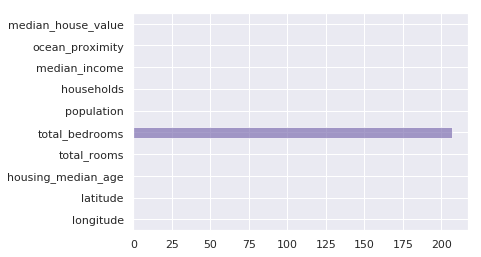

In [0]:
# A Frequncy Plot to show the number of null values in each column of the data
sns.set()
df.isnull().sum().plot(kind='barh', alpha= 0.7)
plt.show()

There are 207 NA values in total_bedrooms as per instructed lets impute the NA values with mean value

In [0]:
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [0]:
df.total_bedrooms.mean()

537.8705525375618

*Lets impute NULL values in bedrooms with mean value of total_bedrooms*

In [0]:
# Imputing NULL
df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace= True)

In [0]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

*Data is all cleaned up. Let's Start with our analysis*

*Encoding the categorical values*

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [0]:
# Joining the columns created by get_dummies to our DataFrame
df= df.join(pd.get_dummies(df.ocean_proximity))

In [0]:
# As the encoding is there is no need of the ocean_proximity, we can drop it now
df = df.drop('ocean_proximity', axis=1)

In [0]:
# Lets look at the encoded Data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


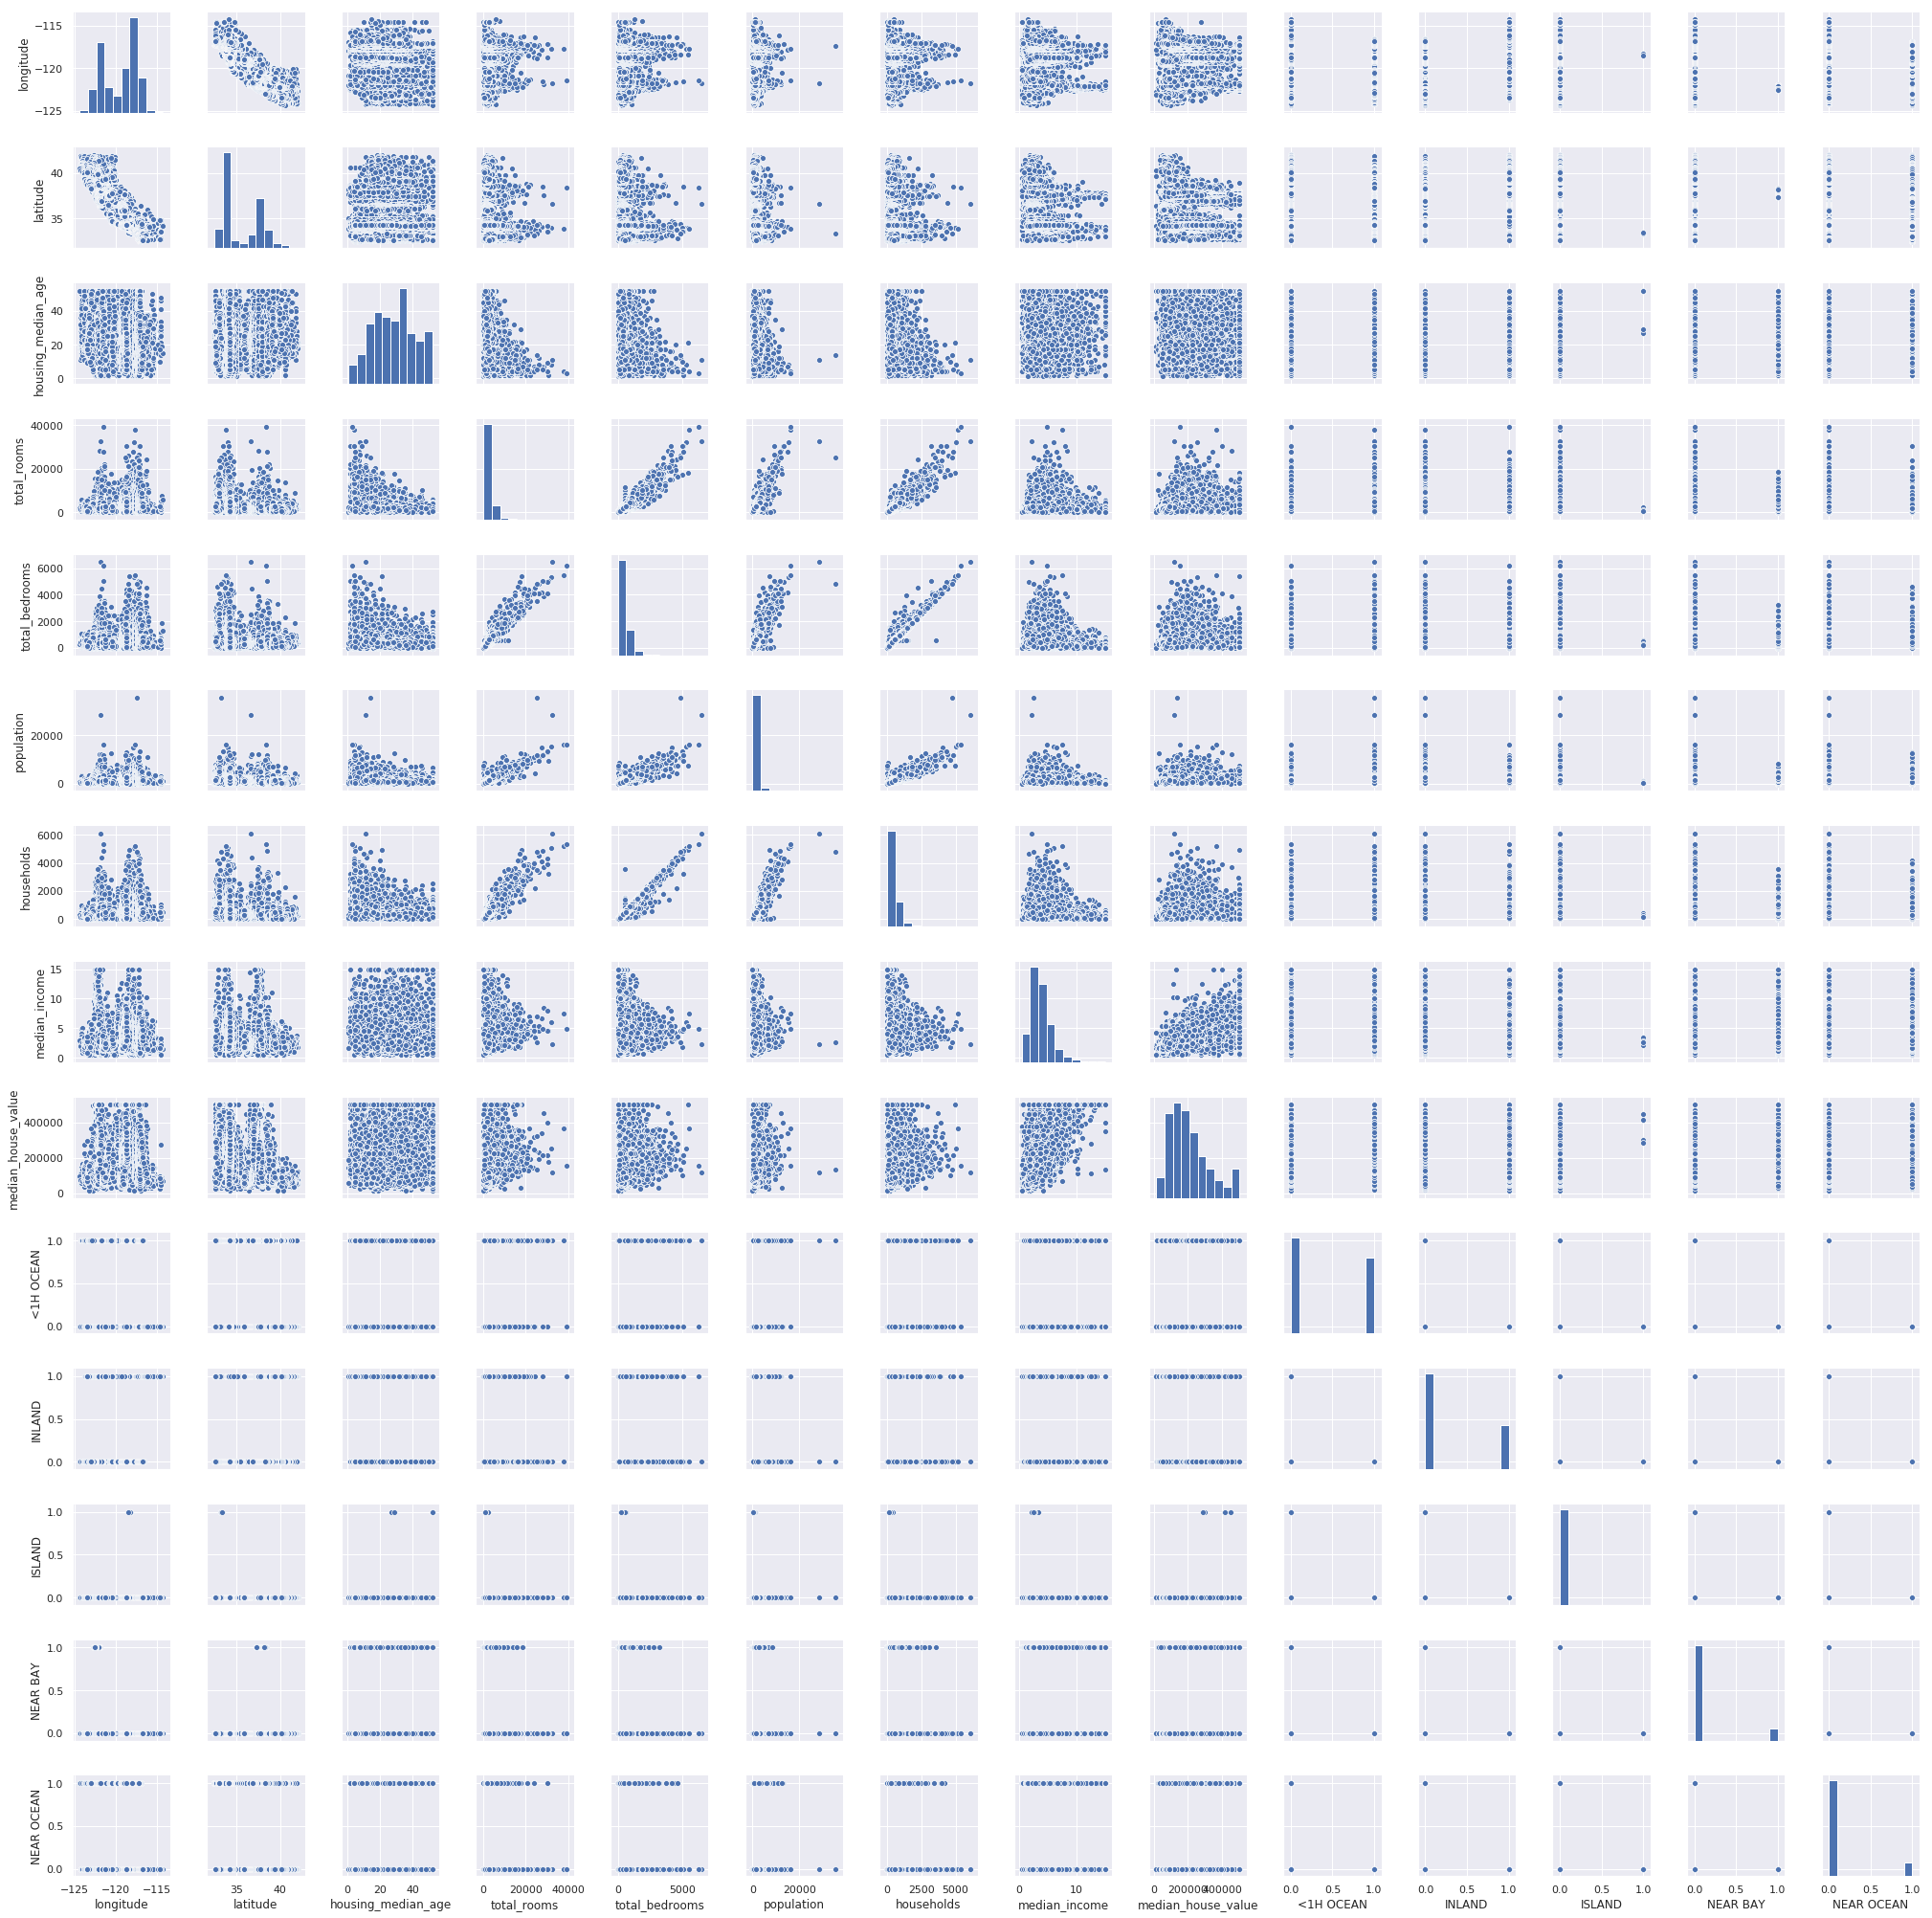

In [0]:
sns.pairplot(data= df, height=2)
plt.show()

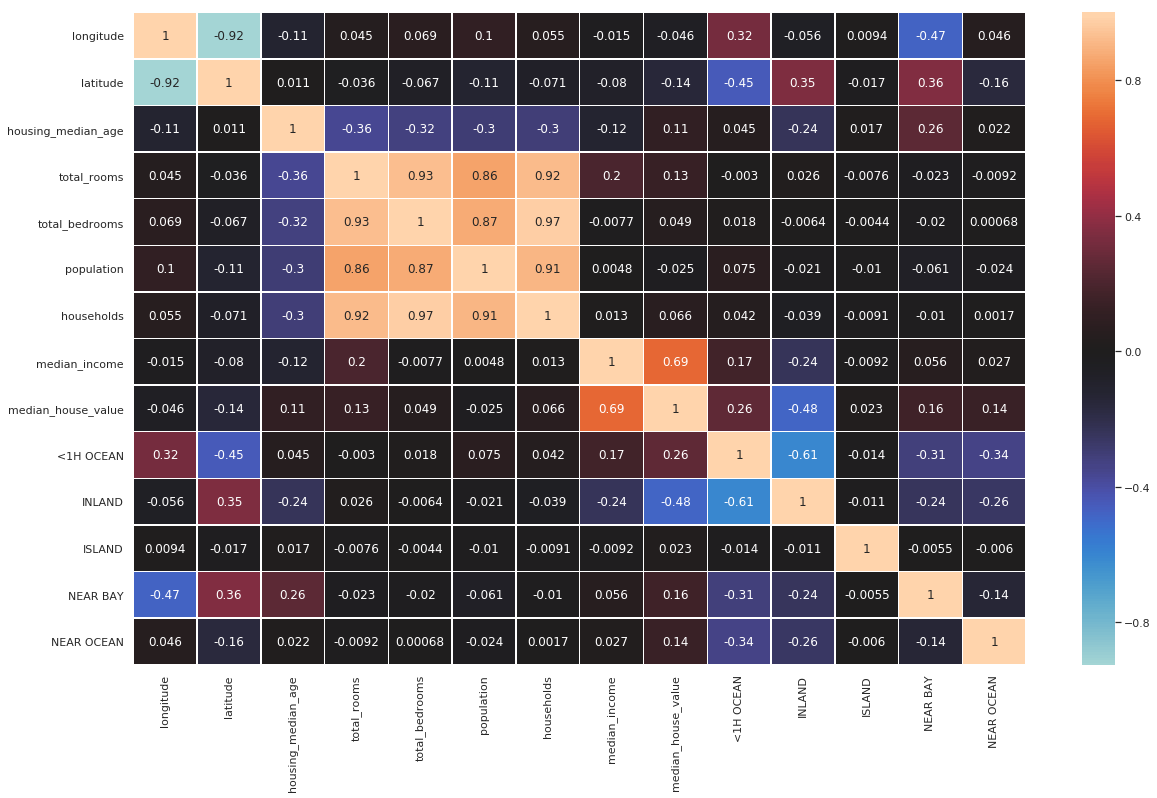

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5 ,ax= ax )

In [0]:
# Lets Separate out the independent and dependent variables
X= df.drop('median_house_value', axis=1)
y= df[['median_house_value']]

In [0]:
# Spliting the Data into Test- Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify= None)

In [0]:
X_train.shape, y_train.shape

((16512, 13), (16512, 1))

In [0]:
X_test.shape, y_test.shape

((4128, 13), (4128, 1))

In [0]:
# Standardize training and test datasets
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train).ravel()
y_test = sc_y.transform(y_test).ravel()

# Ftting Machine Learning Models

In [0]:
# Fitting the Linear regression Model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_mod = sm.OLS(y_train, X_train)
res = lin_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2487.
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:47:34   Log-Likelihood:                -14903.
No. Observations:               16512   AIC:                         2.983e+04
Df Residuals:                   16500   BIC:                         2.992e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4560      0.020    -23.295      0.0

In [0]:
# Prediction using Linear Regression Model
y_pred= lin_mod.predict(res.params, X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, lin_mod.predict(res.params, X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, lin_mod.predict(res.params, X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, lin_mod.predict(res.params, X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.6439781856640889
Mean Squared Error Value: 0.356021814335911
Root Mean Squared Error Value: 0.5966756357820479

Model Performance on Test Set: 
 
R-Squared Value:  0.6508315183817982
Mean Squared Error Value: 0.3651198938285859
Root Mean Squared Error Value: 0.6042515153713608


*Thats the results we are getting Lets try Linear regression with sone optimisation*

In [0]:
# Regressor with Sochastic Gradient Descent optimiser
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter= 300, penalty=None, eta0= 0.001, random_state= 42)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=300,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
# Prediction using Linear Regression Model with SGD optimiser
y_pred= sgd_reg.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, sgd_reg.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, sgd_reg.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, sgd_reg.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.6439666456586673
Mean Squared Error Value: 0.35603335434133265
Root Mean Squared Error Value: 0.596685305953928

Model Performance on Test Set: 
 
R-Squared Value:  0.650841834160386
Mean Squared Error Value: 0.3651091067839899
Root Mean Squared Error Value: 0.6042425893496667


*We see a little improvement in our model this algorithm lets try some regularised linear models*

In [0]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=3, solver= "cholesky" , max_iter= 1500)
ridge_reg.fit(X_train, y_train)
y_pred= ridge_reg.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, ridge_reg.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, ridge_reg.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.643977617037266
Mean Squared Error Value: 0.356022382962734
Root Mean Squared Error Value: 0.5966761122776192

Model Performance on Test Set: 
 
R-Squared Value:  0.6508320003469004
Mean Squared Error Value: 0.36511938984539105
Root Mean Squared Error Value: 0.6042510983402438


In [0]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001, max_iter=500)
lasso_reg.fit(X_train, y_train)
y_pred= lasso_reg.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, lasso_reg.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, lasso_reg.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.6438700032169575
Mean Squared Error Value: 0.35612999678304247
Root Mean Squared Error Value: 0.5967662832156677

Model Performance on Test Set: 
 
R-Squared Value:  0.6508976728553124
Mean Squared Error Value: 0.36505071715423704
Root Mean Squared Error Value: 0.6041942710372525


*With lasso regularisation we are getting sone improvement lets try one last one Elastic Net*

In [0]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net= ElasticNet(alpha=0.001, l1_ratio=0.5 ,max_iter=200)
elastic_net.fit(X_train, y_train)
y_pred= elastic_net.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, elastic_net.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, elastic_net.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.6439284651752376
Mean Squared Error Value: 0.3560715348247624
Root Mean Squared Error Value: 0.5967172989152923

Model Performance on Test Set: 
 
R-Squared Value:  0.6508720216448214
Mean Squared Error Value: 0.36507754021457633
Root Mean Squared Error Value: 0.6042164680100802


*Enough of linear model lets try something more robust*

In [0]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred= tree_reg.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, tree_reg.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, tree_reg.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.9999999999999475
Mean Squared Error Value: 5.2531933426289027e-14
Root Mean Squared Error Value: 2.2919845860364992e-07

Model Performance on Test Set: 
 
R-Squared Value:  0.680615073028396
Mean Squared Error Value: 0.3339757073315513
Root Mean Squared Error Value: 0.5779063136283867


**Wait, What! No error at all for training set, the model has badly overfit the Data **

In [0]:
# Better evaluation using Cross- validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg, X_train, y_train, scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores)

In [0]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [0]:
display_scores(tree_rmse_scores)

Scores:  [0.61487329 0.58071081 0.57867709 0.62164953 0.58559506 0.61920761
 0.58519442 0.59006515 0.57482334 0.58099782]
Mean:  0.5931794110376896
Standard deviation:  0.01714858696275676


**Now the decision tree doesn't look as good as it did earlier. In fact, It performs worse than Linear Regression. So to prevent overfitting we need to do pruning of the regression tree**

In [0]:
# Decision Tree Regression with pruning
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor(splitter = 'random', max_leaf_nodes = 180, min_samples_leaf = 90, max_depth= 90)
tree_reg.fit(X_train, y_train)
y_pred= tree_reg.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, tree_reg.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, tree_reg.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.6018171643978298
Mean Squared Error Value: 0.3981828356021702
Root Mean Squared Error Value: 0.6310173021416847

Model Performance on Test Set: 
 
R-Squared Value:  0.6149166758740574
Mean Squared Error Value: 0.40267546992905245
Root Mean Squared Error Value: 0.6345671516309779


**This doesn't look like over fitting and check it with cross validation**

In [0]:
# Better evaluation using Cross- validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg, X_train, y_train, scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores)

In [0]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [0]:
display_scores(tree_rmse_scores)

Scores:  [0.62473229 0.63333865 0.62917799 0.63006621 0.57245187 0.66311605
 0.59206373 0.61362696 0.59546109 0.64887994]
Mean:  0.6202914789020795
Standard deviation:  0.026004051785748588


*Now thats a great Insight after pruning the model has generalised for  given data*

*Let's try ensembled techniques i.e Randon forest*

In [0]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=12, random_state=42)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, rf.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, rf.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.9660821666404802
Mean Squared Error Value: 0.03391783335951979
Root Mean Squared Error Value: 0.1841679487845803

Model Performance on Test Set: 
 
R-Squared Value:  0.8179711372709207
Mean Squared Error Value: 0.1903446689270565
Root Mean Squared Error Value: 0.4362850775892484


In [0]:
# Better evaluation using Cross- validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rf, X_train, y_train, scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores= np.sqrt(-scores)

In [0]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [0]:
display_scores(forest_rmse_scores)

Scores:  [0.45139371 0.44149817 0.43309988 0.45270472 0.43354072 0.4558576
 0.43053578 0.44742027 0.42459054 0.42710742]
Mean:  0.43977488103562107
Standard deviation:  0.010872275171279434


In [0]:
# Fine tuning the model using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 12, 13]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 6, 8]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 12, 13]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.556101613986743 {'max_features': 2, 'n_estimators': 3}
0.4789743567823606 {'max_features': 2, 'n_estimators': 10}
0.4576227177500122 {'max_features': 2, 'n_estimators': 30}
0.5220637548806166 {'max_features': 4, 'n_estimators': 3}
0.4580186611181834 {'max_features': 4, 'n_estimators': 10}
0.43842604283772185 {'max_features': 4, 'n_estimators': 30}
0.5116462161690616 {'max_features': 6, 'n_estimators': 3}
0.4532557593888541 {'max_features': 6, 'n_estimators': 10}
0.43153171932901485 {'max_features': 6, 'n_estimators': 30}
0.5111692916862344 {'max_features': 8, 'n_estimators': 3}
0.4494115016588583 {'max_features': 8, 'n_estimators': 10}
0.4309590886766381 {'max_features': 8, 'n_estimators': 30}
0.49525800812682796 {'max_features': 12, 'n_estimators': 3}
0.4480581253331982 {'max_features': 12, 'n_estimators': 10}
0.4334800797498316 {'max_features': 12, 'n_estimators': 30}
0.49949787000515233 {'max_features': 13, 'n_estimators': 3}
0.45023983279870394 {'max_features': 13, 'n_estimators'

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.13589576e-01, 1.06484860e-01, 4.77563060e-02, 2.93533830e-02,
       2.78419349e-02, 3.64548657e-02, 2.33408408e-02, 4.41490457e-01,
       9.40202054e-03, 1.55066602e-01, 3.58622089e-04, 1.91317356e-03,
       6.94735845e-03])

In [0]:
sorted(zip(feature_importances, X.columns), reverse=True)

[(0.441490457184614, 'median_income'),
 (0.1550666018105521, 'INLAND'),
 (0.11358957594245754, 'longitude'),
 (0.10648485995692941, 'latitude'),
 (0.04775630596967099, 'housing_median_age'),
 (0.03645486571479063, 'population'),
 (0.029353383040651375, 'total_rooms'),
 (0.027841934939289294, 'total_bedrooms'),
 (0.023340840806069258, 'households'),
 (0.009402020536233461, '<1H OCEAN'),
 (0.006947358448209122, 'NEAR OCEAN'),
 (0.0019131735618116966, 'NEAR BAY'),
 (0.0003586220887211011, 'ISLAND')]

In [0]:
# Final Model
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_rmse

0.42676572730977025

**We can compute a 95% confidence interval for the test RMSE:**

In [0]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.40676695, 0.44586839])

# Bonus exercise: Perform Linear Regression with one independent variable

In [0]:
X= df.median_income
y=df.median_house_value

In [0]:
# Spliting the Data into Test- Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify= None)


In [0]:
X_train= X_train.reshape(-1, 1)
X_test= X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

In [0]:
# Standardize training and test datasets
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train).ravel()
y_test = sc_y.transform(y_test).ravel()

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print( regressor.coef_, regressor.intercept_)

[0.68585296] 2.3619511372729073e-16


In [0]:
y_perd= regressor.predict(X_test)

In [0]:
# Model Evaluation Metrics
print("Model Performance on Training Set: \n")
print("R-Squared Value: ", r2_score(y_train, regressor.predict(X_train)))
print("Mean Squared Error Value:",  mean_squared_error(y_train, regressor.predict(X_train)))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_train, regressor.predict(X_train))))
print("\nModel Performance on Test Set: \n ")
print("R-Squared Value: ", r2_score(y_test, y_pred))
print("Mean Squared Error Value:",  mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error Value:",  np.sqrt(mean_squared_error(y_test, y_pred)))

Model Performance on Training Set: 

R-Squared Value:  0.4703942846392545
Mean Squared Error Value: 0.5296057153607455
Root Mean Squared Error Value: 0.7277401427437856

Model Performance on Test Set: 
 
R-Squared Value:  0.8179711372709207
Mean Squared Error Value: 0.1903446689270565
Root Mean Squared Error Value: 0.4362850775892484


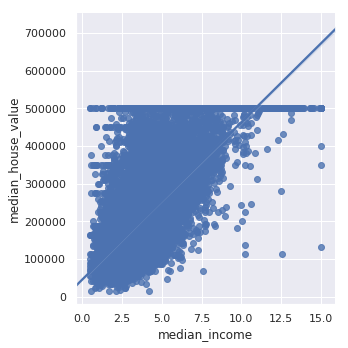

In [0]:
sns.set(color_codes=True)
sns.lmplot(x="median_income", y="median_house_value", data=df)